<a href="https://colab.research.google.com/github/PingPingE/Deeplearning_with_Keras/blob/master/day02_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#시각화를 위한 color 딕셔너리
color_dic = {0:['#005b6e','#04668c'],1:['#3c6ca7','#786eb7'],2:['#a86bba','#da66ac'],
             3:['#ff6792','#aa6792'],4:['#d8e0bb','#b6cec7'],5:['#ff5050','#ffaa00'],
            6:['#ff99ff','#ff6699',],7:['#e6f2ff','#99ccff'],8:['#ccccff','#cc99ff'],
            9:['#ff9966', '#ff6600']}

#와인 종류 예측: red or white

- fixed acidity	고정산, 와인의 산도를 제어								
- volatile acidity	휘발산, 와인의 향과 연관									
- citric acid	구연산, 와인의 신선함을 올림								
- residual sugar	잔여 당분, 와인의 단 맛 올림								
- chlorides	염화물, 와인의 짠 맛의 원인								
- free sulfur dioxide	황 화합물, 와인을 오래 보관하게 함							
- total sulfur dioxide	황 화합물, 와인을 오래 보관하게 함								
- density	밀도, 와인의 무게감을 나타냄							
- pH	산성도, 와인의 신 맛의 정도								
- sulphates	황 화합물, 와인을 오래 보관하게 함								
- alcohol	알코올, 와인의 단 맛과 무게감에 영향							
- quality	와인의 품질	3,4,5,6,7,8	

### 실습문제
1. red 와인은 0, white 와인은 1로 type컬럼에 추가하시오.
2. red와 white를 합치시오. concat 사용
3. red와 white의 각각의 개수를 구하시오.
4. minmaxscale로 정규화하시오.
5. 데이터를 섞은 후 80:20으로 분할 하시오. train_X, test_X, train_Y, test_Y
6. numpy 배열로 변환하시오. ( to_numpy()사용 )



### 데이터 확인 및 전처리

In [ ]:
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')


#==========================================
# train_Y, test_Y는 원핫 인코딩으로 변환하시오.
# 모델생성.... 

In [ ]:
red['type'] = 0

In [ ]:
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


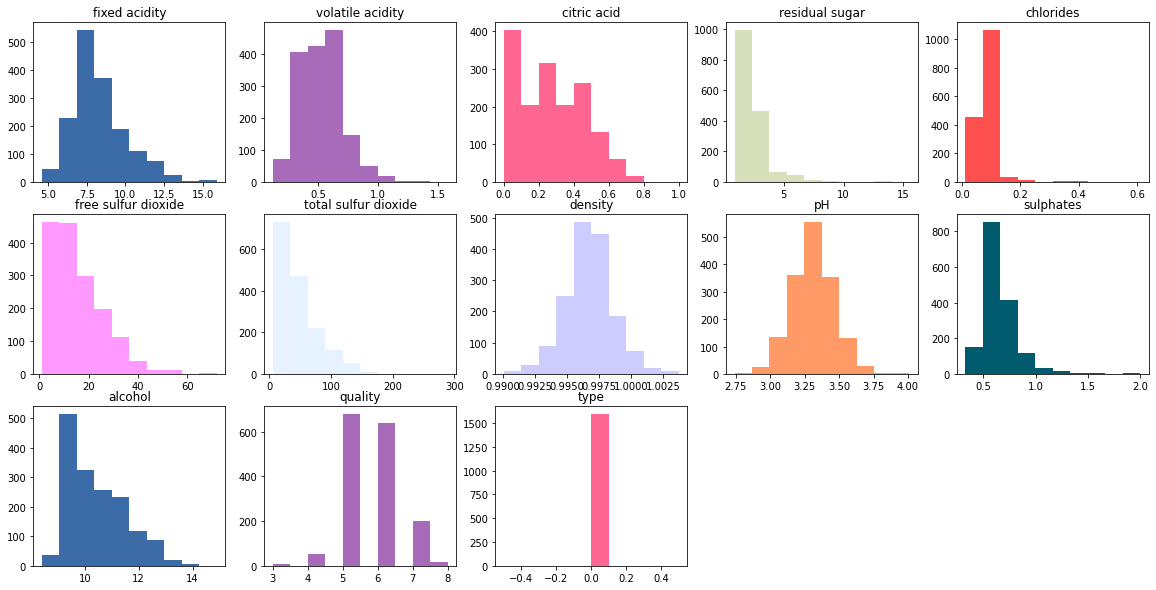

In [ ]:
plt.figure(figsize=(20,10))
for e,i in enumerate(red.columns,1):
  plt.subplot(3,5,e)
  plt.hist(red[i],color = color_dic[e%10][0])
  plt.title(i)

In [ ]:
white['type'] = 1
white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


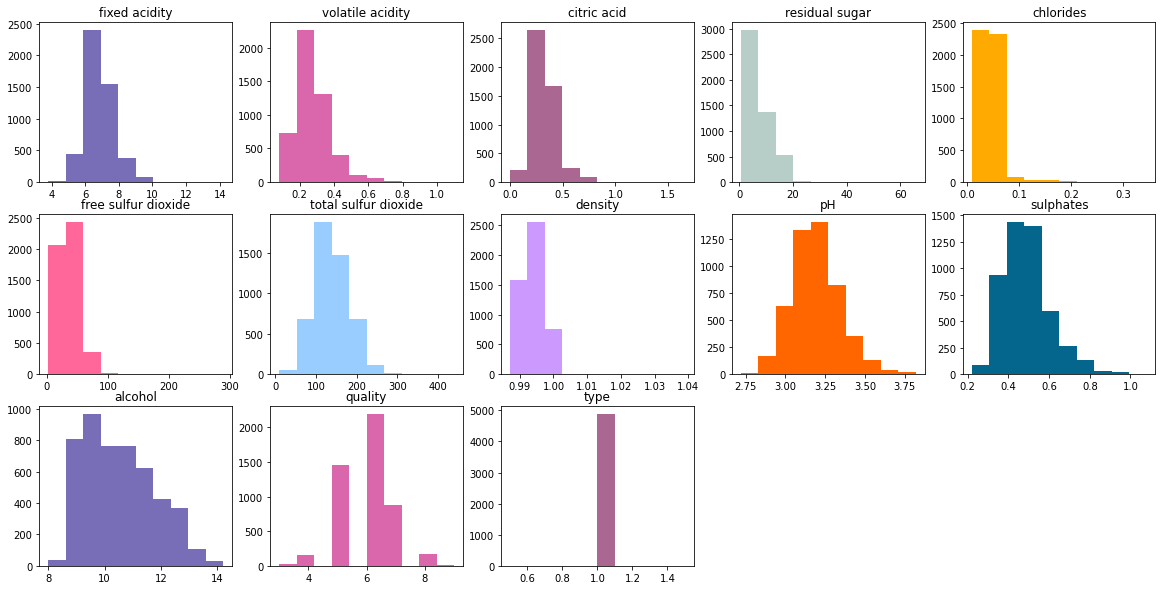

In [ ]:
plt.figure(figsize=(20,10))
for e,i in enumerate(white.columns,1):
  plt.subplot(3,5,e)
  plt.hist(white[i],color = color_dic[e%10][1])
  plt.title(i)

In [ ]:
wine_df = pd.concat([red,white])
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [ ]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [ ]:
wine_df['type'].value_counts()

1    4898
0    1599
Name: type, dtype: int64

In [ ]:
all_feature = wine_df.columns[:-1]
all_feature

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
wine_df[all_feature] = minmax.fit_transform(wine_df[all_feature])

In [ ]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.282257,0.173111,0.191948,0.074283,0.078129,0.102518,0.252868,0.146262,0.386435,0.174870,0.361131,0.469730,0.753886
std,0.107143,0.109758,0.087541,0.072972,0.058195,0.061630,0.130235,0.057811,0.124641,0.083599,0.172857,0.145543,0.430779
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.214876,0.100000,0.150602,0.018405,0.048173,0.055556,0.163594,0.100829,0.302326,0.117978,0.217391,0.333333,1.000000
50%,0.264463,0.140000,0.186747,0.036810,0.063123,0.097222,0.258065,0.149990,0.379845,0.162921,0.333333,0.500000,1.000000
75%,0.322314,0.213333,0.234940,0.115031,0.093023,0.138889,0.345622,0.190476,0.465116,0.213483,0.478261,0.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
len(all_feature)

12

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(wine_df[all_feature], wine_df['type'], test_size=0.2)

- 데이터 불균형 확인

In [ ]:
y_train.value_counts()

1    3923
0    1274
Name: type, dtype: int64

In [ ]:
y_test.value_counts()

1    975
0    325
Name: type, dtype: int64

- 언더샘플링

In [ ]:
from imblearn.under_sampling import *

enn_X, enn_y = OneSidedSelection(random_state=0).fit_sample(X_train, y_train)
for _ in range(10):
  enn_X, enn_y = OneSidedSelection(random_state=0).fit_sample(enn_X, enn_y)

In [ ]:
y_train.value_counts()#언더샘플링 전

1    3923
0    1274
Name: type, dtype: int64

In [ ]:
pd.DataFrame(enn_y)[0].value_counts() #언더샘플링 후

1    2034
0    1274
Name: 0, dtype: int64

### 모델링


In [ ]:
model = keras.Sequential([
                          keras.layers.Dense(units=32,activation='relu',input_shape=(len(all_feature),)),
                          keras.layers.Dense(units=64,activation='relu'),
                          keras.layers.Dense(units=64,activation='relu'),
                          keras.layers.Dense(units=128,activation='relu'),
                          keras.layers.Dense(units=1, activation='sigmoid')
                  
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 32)                416       
_________________________________________________________________
dense_20 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_21 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_22 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 129       
Total params: 15,137
Trainable params: 15,137
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.01), loss='binary_crossentropy',metrics=['accuracy','binary_crossentropy'])

In [ ]:
history = model.fit(enn_X, enn_y, batch_size= 100, epochs= 500, validation_split=0.2)

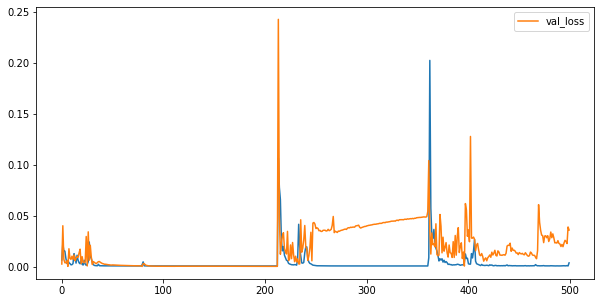

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()

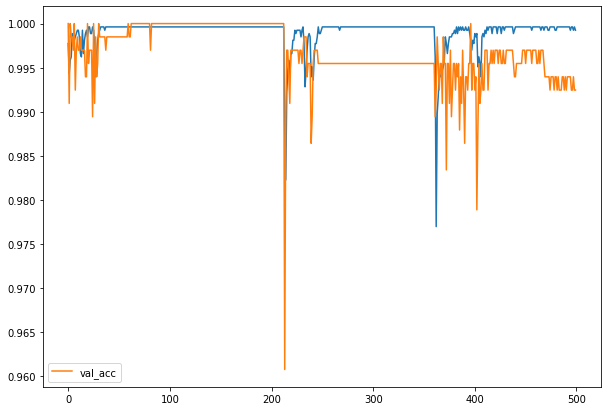

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], label = 'val_acc')
plt.legend()

### 테스트


In [ ]:
model.evaluate(X_test, y_test)

41/41 [==============================] - 0s 2ms/step - loss: 0.0521 - accuracy: 0.9938 - binary_crossentropy: 0.0521


[0.05210230499505997, 0.9938461780548096, 0.05210230499505997]